In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries are working correctly!")


Libraries are working correctly!


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('C:/Users/YASHRA/Downloads/sales-analytics-internship/sales_data.csv')

# Show first 5 rows
df.head()


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,03-02-2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,21-04-2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,21-09-2023,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,24-08-2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,24-03-2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [5]:
# Check data types and null values
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [9]:
# Convert to datetime with correct format
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], format='%d-%m-%Y')

# Check
print(df['Sale_Date'].head())

# Save cleaned file
df.to_csv('C:/Users/YASHRA/Downloads/sales-analytics-internship/data/cleaned/sales_data_cleaned.csv', index=False)


0   2023-02-03
1   2023-04-21
2   2023-09-21
3   2023-08-24
4   2023-03-24
Name: Sale_Date, dtype: datetime64[ns]


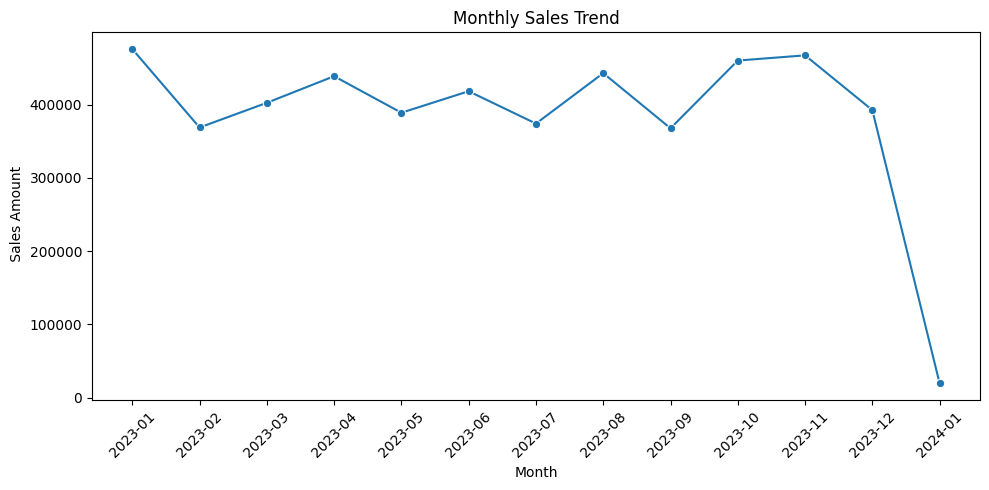

In [11]:
# Group by month
df['Month'] = df['Sale_Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Sales_Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Sales_Amount', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel(' Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\YASHRA\AppData\Local\Temp\ipykernel_32576\2184703782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales_Amount', data=region_sales, palette='viridis')


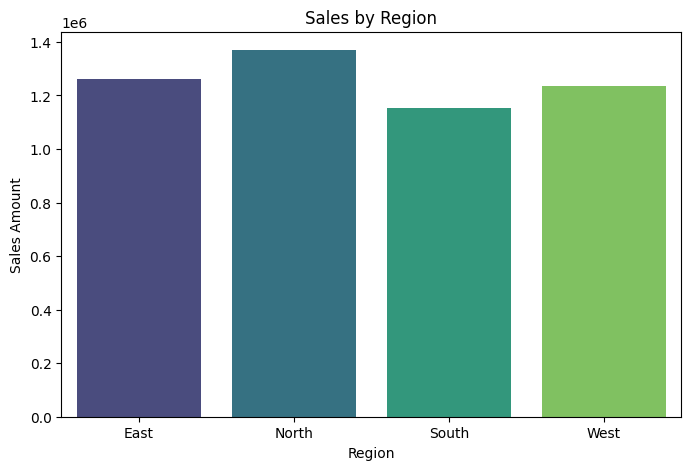

In [12]:
region_sales = df.groupby('Region')['Sales_Amount'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales_Amount', data=region_sales, palette='viridis')
plt.title('Sales by Region')
plt.ylabel('Sales Amount')
plt.show()


C:\Users\YASHRA\AppData\Local\Temp\ipykernel_32576\1164343553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales_Amount', y='Product_ID', data=top_products, palette='magma')


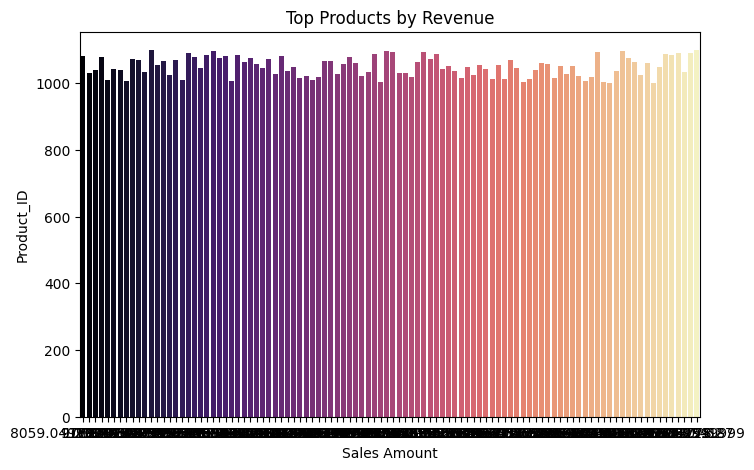

In [16]:
top_products = df.groupby('Product_ID')['Sales_Amount'].sum().reset_index().sort_values(by='Sales_Amount', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Sales_Amount', y='Product_ID', data=top_products, palette='magma')
plt.title('Top Products by Revenue')
plt.xlabel('Sales Amount')
plt.show()


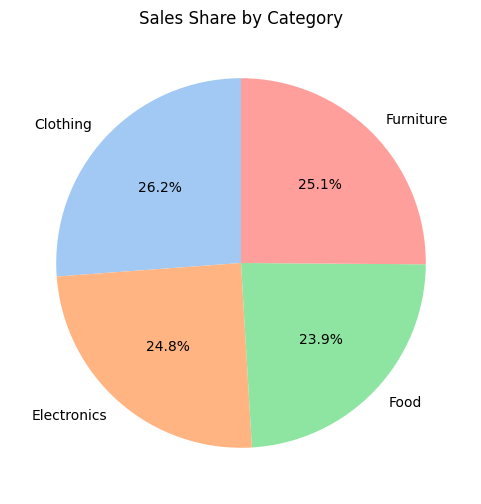

In [14]:
category_sales = df.groupby('Product_Category')['Sales_Amount'].sum()

plt.figure(figsize=(6,6))
category_sales.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sales Share by Category')
plt.ylabel('')
plt.show()


In [17]:
plt.savefig('../exports/monthly_sales_trend.png')


<Figure size 640x480 with 0 Axes>